In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

/pbs/throng/lsst/users/dagoret/External/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
monthfile='MERRA2_2017_tavg1_2d_aer_Nx_M2T1NXAER_ctio_06.csv'
yearfile='MERRA2_2017_tavg1_2d_aer_Nx_M2T1NXAER_ctio_AllYear.csv'

In [4]:
df_month=pd.read_csv(monthfile)

In [5]:
df_year=pd.read_csv(yearfile)

In [6]:
df_month.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,696.000000,696.000000,696.000000
mean,1.366802,0.028340,0.026936
std,0.103664,0.017603,0.017459
min,0.851177,0.007889,0.007133
25%,1.324687,0.017509,0.016240
50%,1.378557,0.023852,0.022489
75%,1.425919,0.033924,0.032417
max,1.576016,0.124766,0.123256


In [7]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

In [8]:
exct_aer_month=df_month["TOTEXTTAU"]

In [9]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(exct_aer_month)

In [10]:
print themean_m, thestd_m, thevariation_m

0.028 0.017 60.0


In [11]:
title = "Monthly variation of Aerosols extinctions (jun 2017), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

/pbs/throng/lsst/users/dagoret/External/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


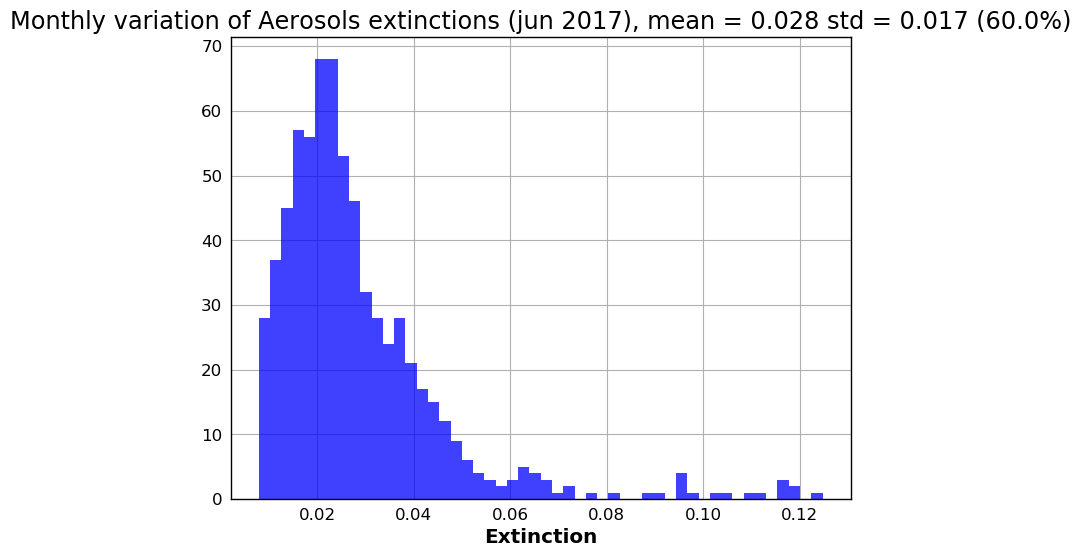

In [12]:
n, bins, patches = plt.hist(exct_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2017_06.pdf')

In [13]:
ang_aer_month=df_month["TOTANGSTR"]

In [14]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(ang_aer_month)

In [15]:
print themean_m, thestd_m, thevariation_m

1.366 0.103 7.0


In [16]:
title = "Monthly variation of Angstrom exponent Aerosols (jun 2017), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

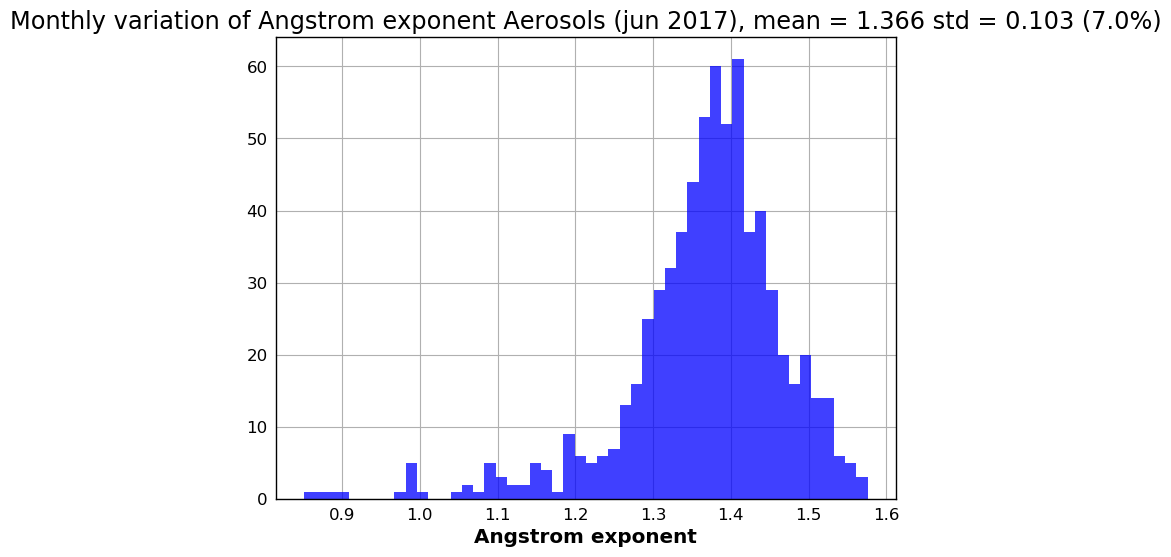

In [17]:
n, bins, patches = plt.hist(ang_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2017_06.pdf')

In [18]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,1464.000000,1464.000000,1464.000000
mean,1.332074,0.032863,0.031426
std,0.107994,0.021460,0.021337
min,0.851177,0.007889,0.007133
25%,1.268029,0.019868,0.018484
50%,1.340830,0.027450,0.026032
75%,1.401138,0.039222,0.037599
max,1.645955,0.256928,0.255425


In [19]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,1.133944,0.012483,0.011450
0.10,1.200260,0.014678,0.013549
0.50,1.340830,0.027450,0.026032
0.90,1.458199,0.056316,0.054858
0.95,1.502519,0.069771,0.068591


In [20]:
exct_aer_year=df_year["TOTEXTTAU"]

In [21]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(exct_aer_year)

In [22]:
title = "Yearly variation of Aerosols extinctions, mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

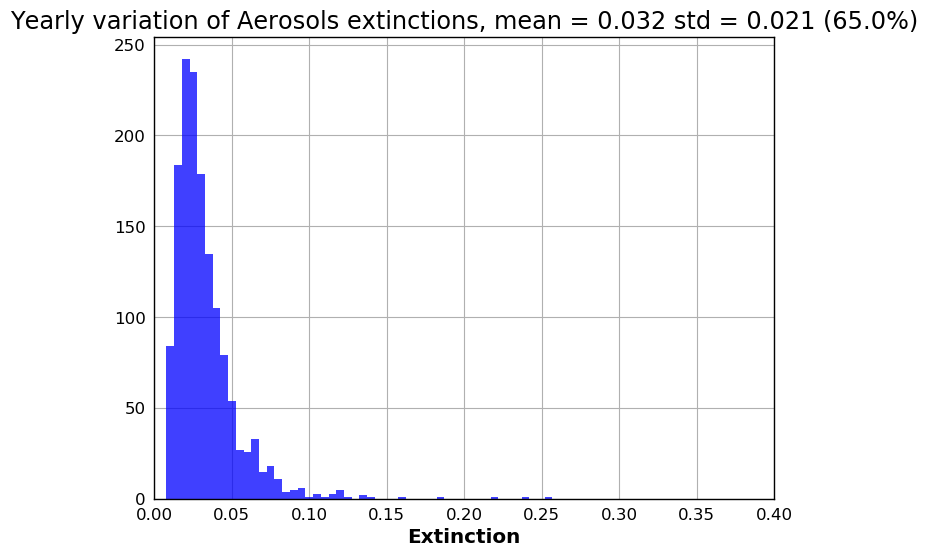

In [23]:
n, bins, patches = plt.hist(exct_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlim(0.,0.4)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2017_year.pdf')

In [24]:
ang_aer_year=df_year["TOTANGSTR"]

In [25]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(ang_aer_year)

In [26]:
title = "Yearly variation of Angstrom exponent Aerosols (2017), mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

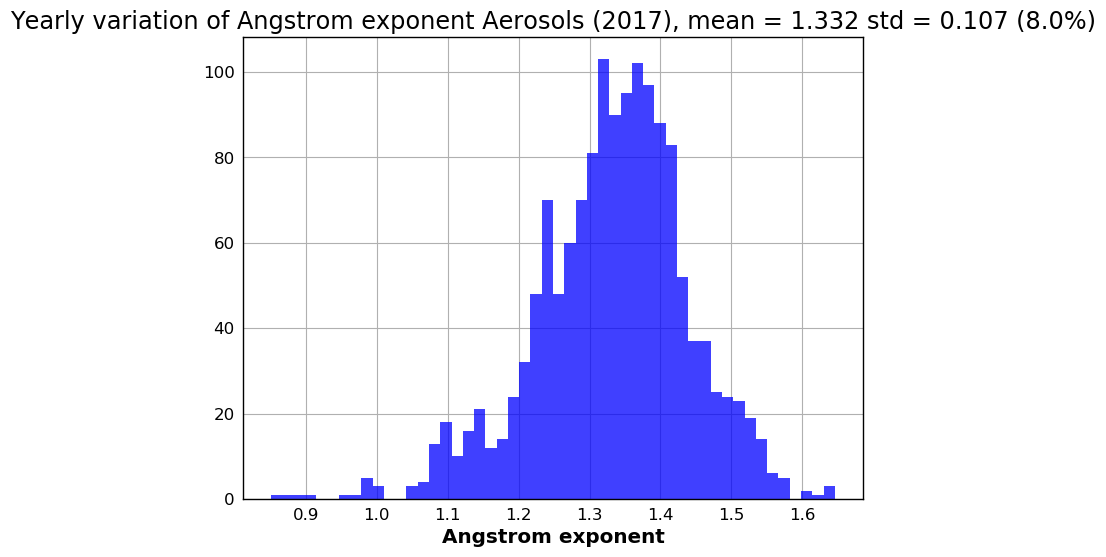

In [27]:
n, bins, patches = plt.hist(ang_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2017_year.pdf')